In [1]:
import sys
dirname = '/Users/m.daffarobani/Documents/personal_research/smt'
if dirname not in sys.path:
    sys.path.append(dirname)

from scipy import linalg
from smt.utils.misc import compute_rms_error

from smt.problems import Sphere, NdimRobotArm, Rosenbrock, CantileverBeam, MixedCantileverBeam, \
NdimRosenbrock, TorsionVibration, WaterFlowLFidelity, RobotArm, HierarchicalNeuralNetwork, WingWeight
from smt.sampling_methods import LHS
from smt.surrogate_models import LS, QP, KPLS, KRG, KPLSK, GEKPLS, MGP

#to ignore warning messages
import warnings
warnings.filterwarnings("ignore")

import numpy as np
from sklearn.metrics import mean_squared_error

from smt.explainability_tools import PartialDependenceDisplay
import pandas as pd


In [2]:
X_tr = pd.read_csv('../../X_tr_wing_weight.csv')
X_te = pd.read_csv('../../X_te_wing_weight.csv')
y_tr = pd.read_csv('../../y_tr_wing_weight.csv')
y_te = pd.read_csv('../../y_te_wing_weight.csv')
X_tr = np.array(X_tr)
X_te = np.array(X_te)
y_tr = np.array(y_tr)
y_te = np.array(y_te)

kriging_model = KRG(theta0=[1e-2]*X_tr.shape[1],print_prediction = False)
kriging_model.set_training_values(X_tr, y_tr)

kriging_model.train()

y_pred = kriging_model.predict_values(X_te)
rmse = mean_squared_error(y_te, y_pred, squared=False)
rmse

___________________________________________________________________________
   
                                  Kriging
___________________________________________________________________________
   
 Problem size
   
      # training points.        : 500
   
___________________________________________________________________________
   
 Training
   
   Training ...
   Training - done. Time (sec): 11.6651437


0.04697580133054768

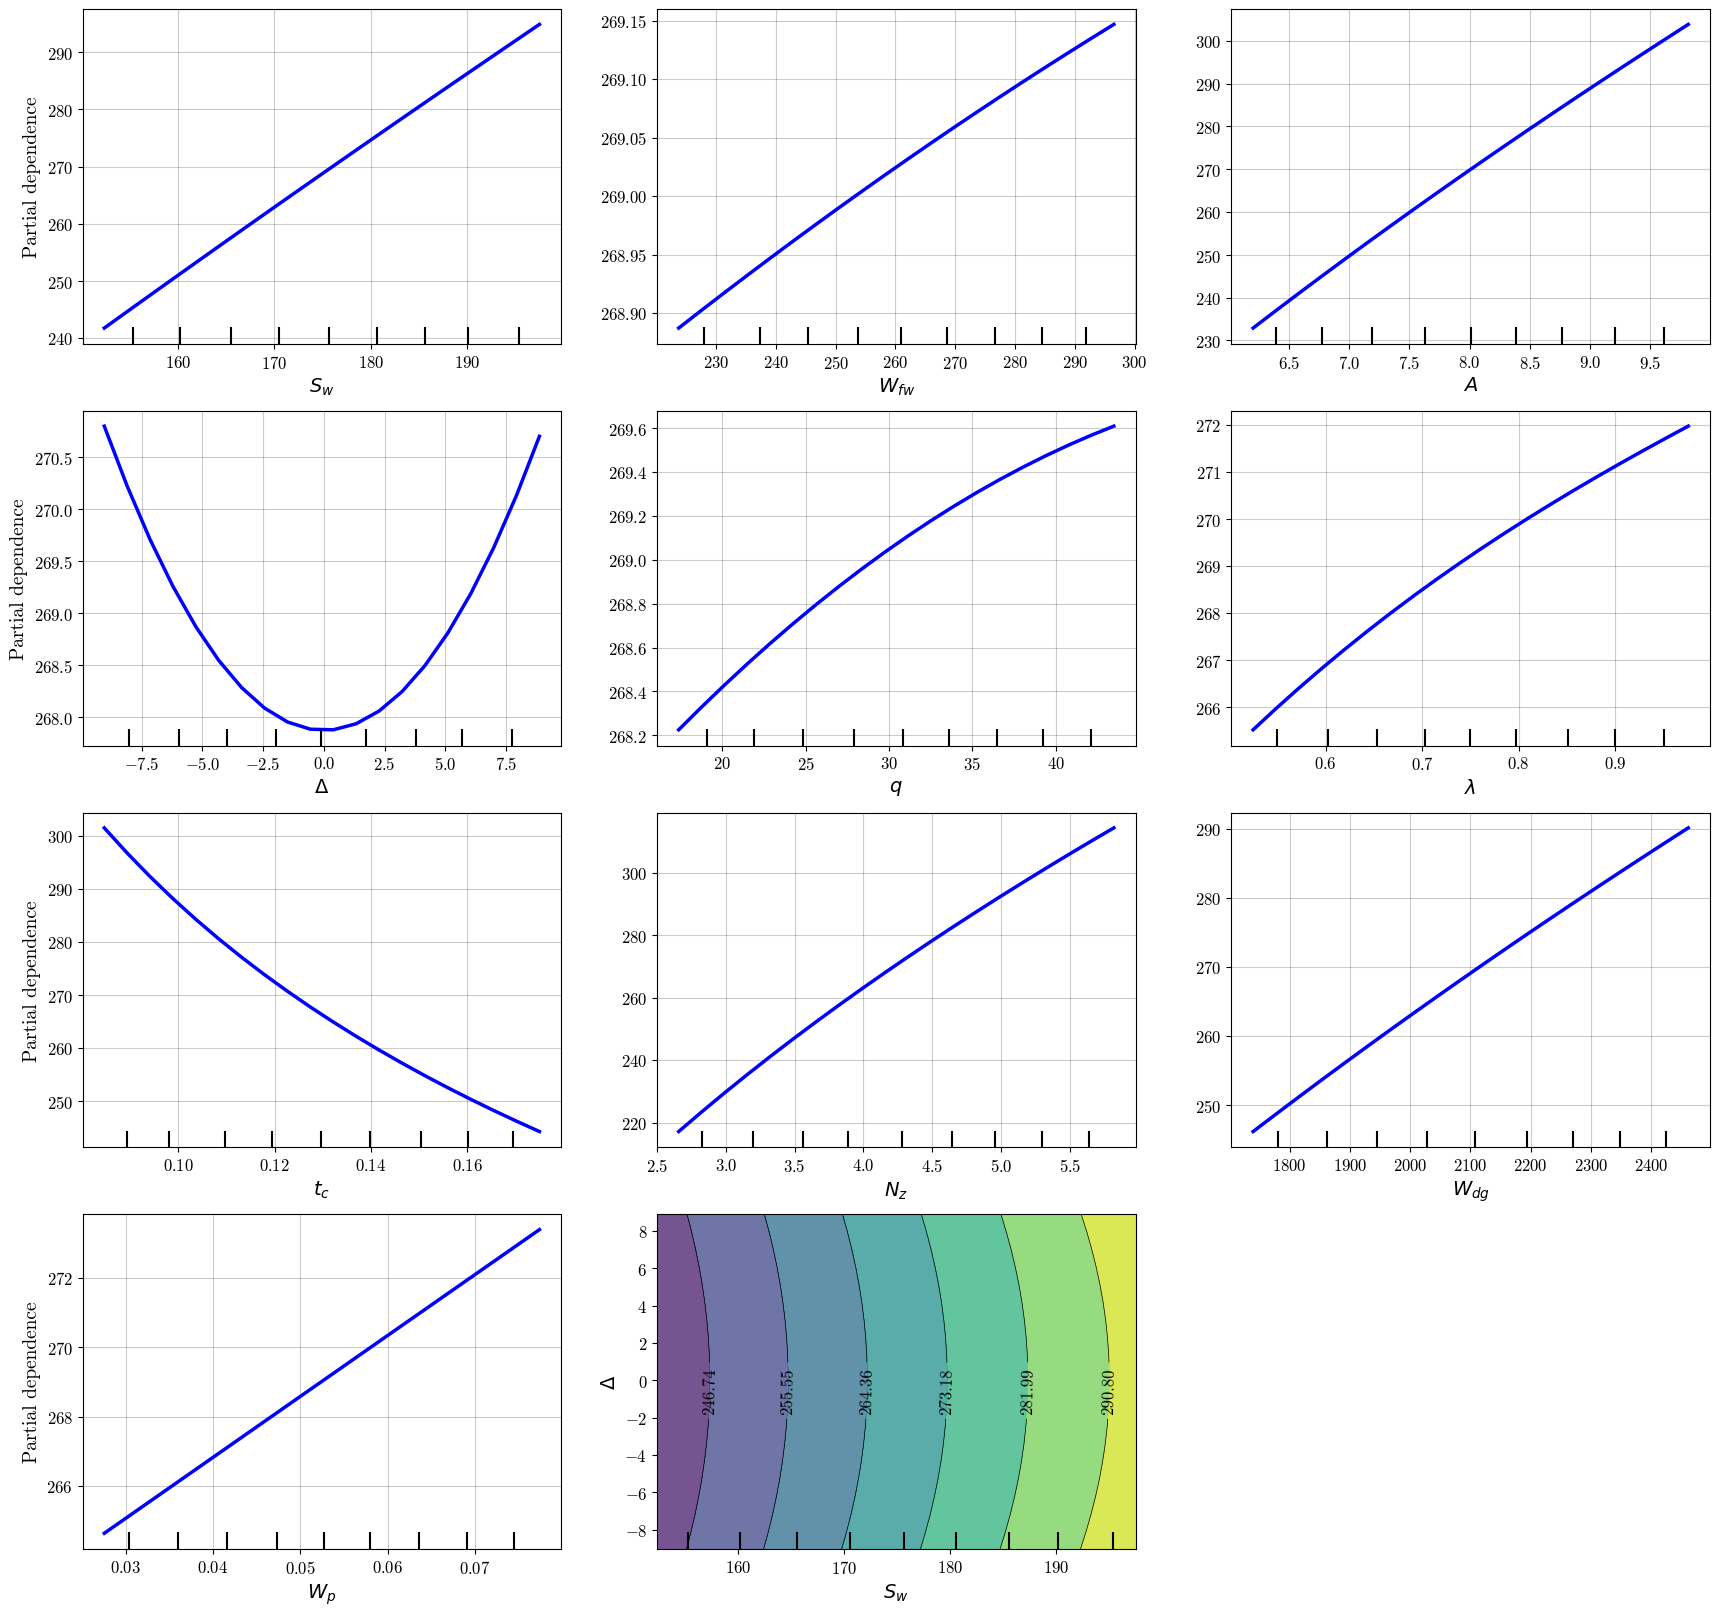

In [3]:
model = kriging_model
features = [0, 1, 2, 3, 4, 5, 6, 7, 8, 9, [0, 3]]
feature_names = [r'$S_{w}$', r'$W_{fw}$', r'$A$', r'$\Delta$', 
                 r'$q$', r'$\lambda$', r'$t_{c}$',
                 r'$N_{z}$', r'$W_{dg}$', r'$W_{p}$']
pdd = PartialDependenceDisplay.from_surrogate_model(model, 
                                                    X_tr, 
                                                    features, 
                                                    grid_resolution=20, 
                                                    kind='average', 
                                                    feature_names=feature_names,
                                                    centered=False)

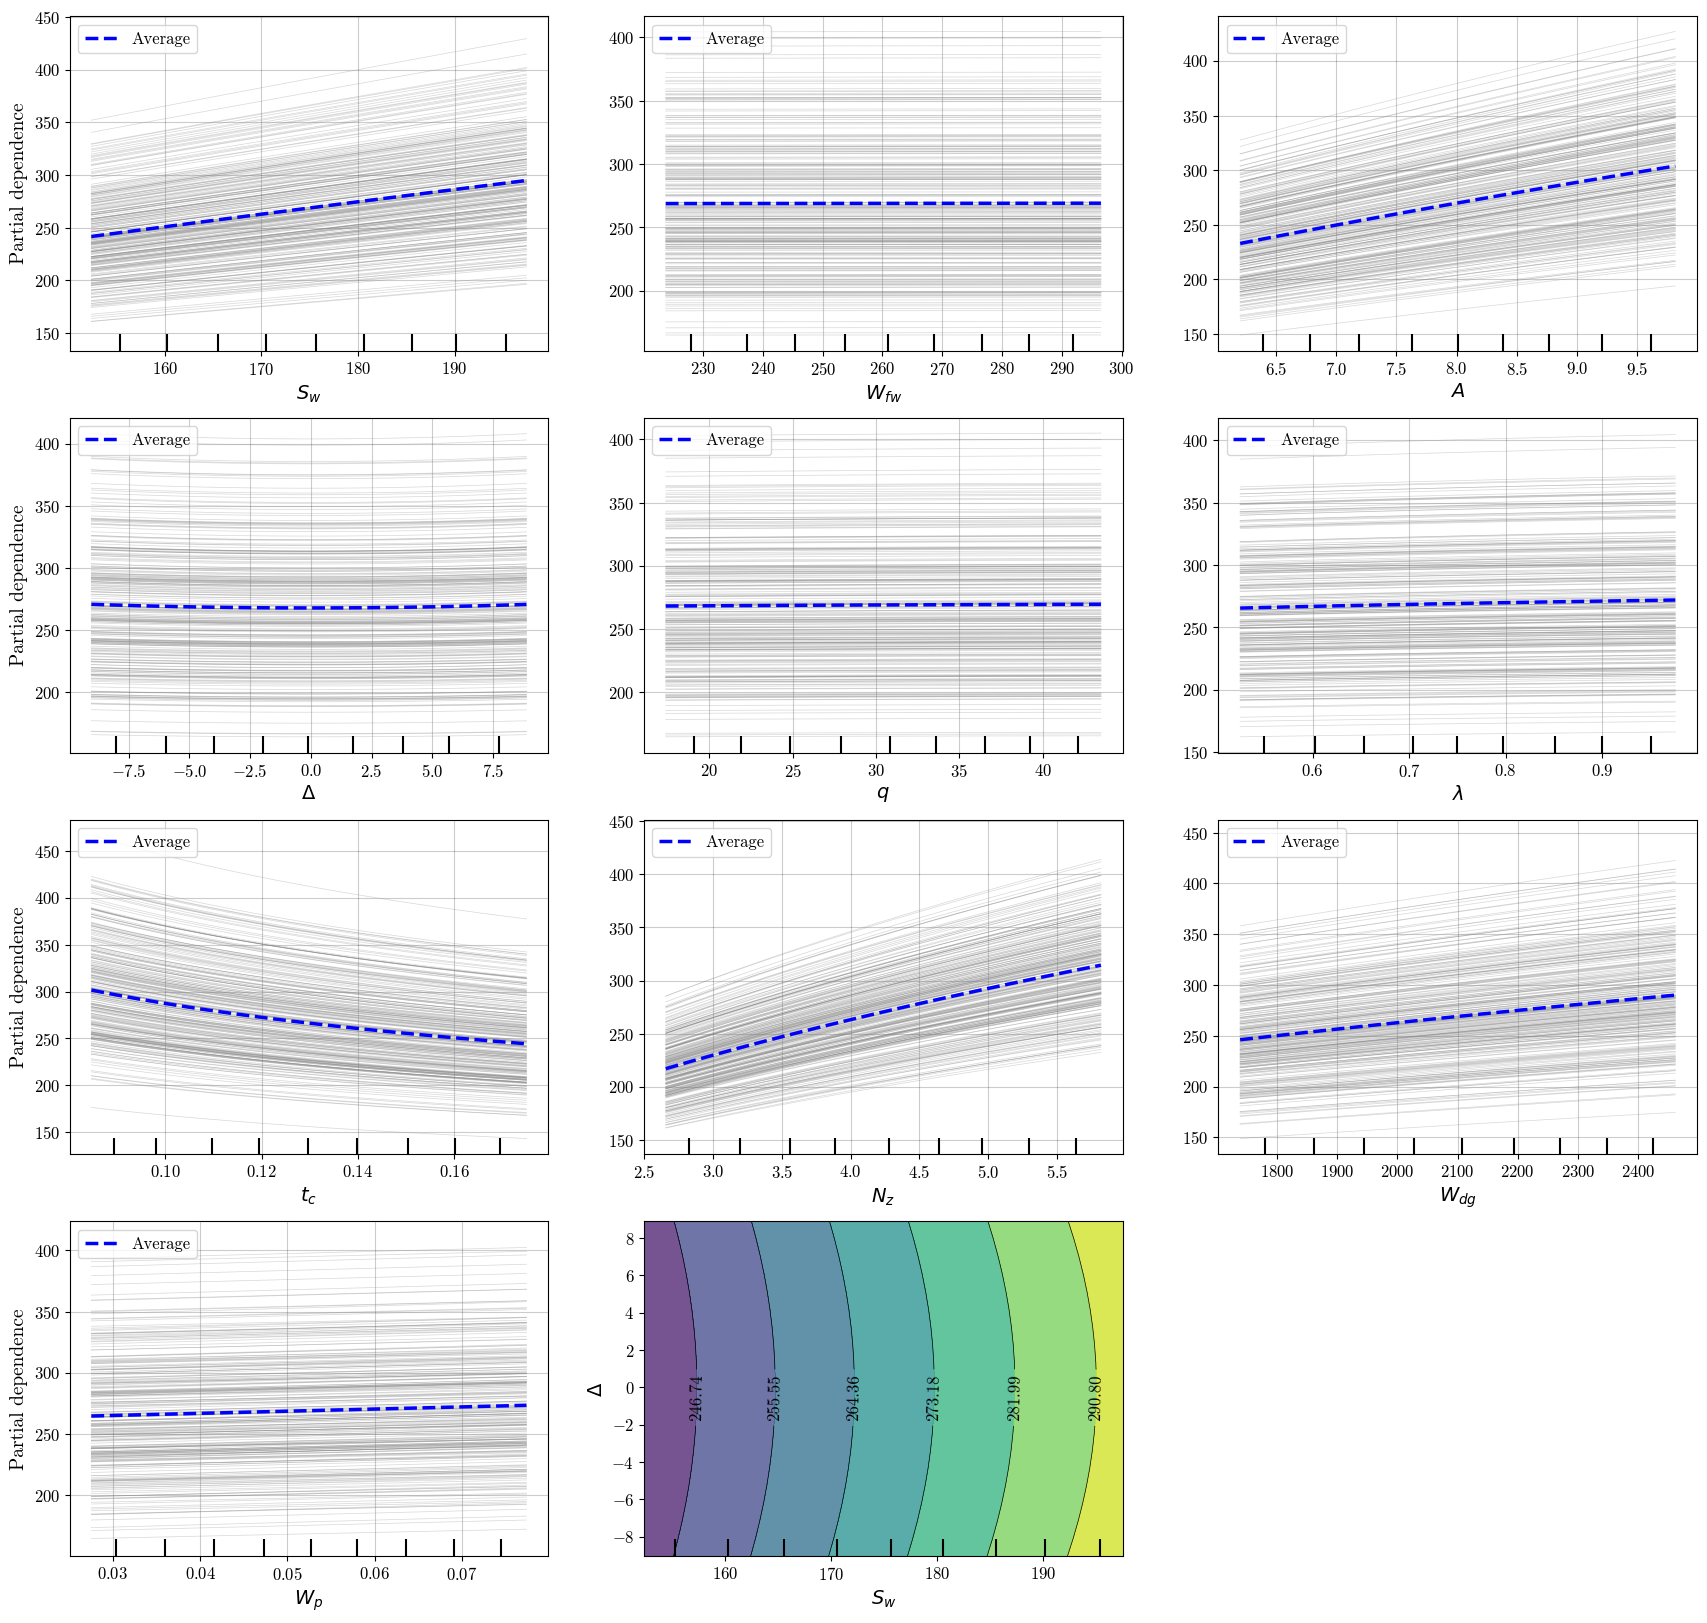

In [4]:
model = kriging_model
features = [0, 1, 2, 3, 4, 5, 6, 7, 8, 9, [0, 3]]
feature_names = [r'$S_{w}$', r'$W_{fw}$', r'$A$', r'$\Delta$', 
                 r'$q$', r'$\lambda$', r'$t_{c}$',
                 r'$N_{z}$', r'$W_{dg}$', r'$W_{p}$']
pdd = PartialDependenceDisplay.from_surrogate_model(model, 
                                                    X_tr, 
                                                    features, 
                                                    grid_resolution=20, 
                                                    kind='both', 
                                                    feature_names=feature_names,
                                                    centered=False)

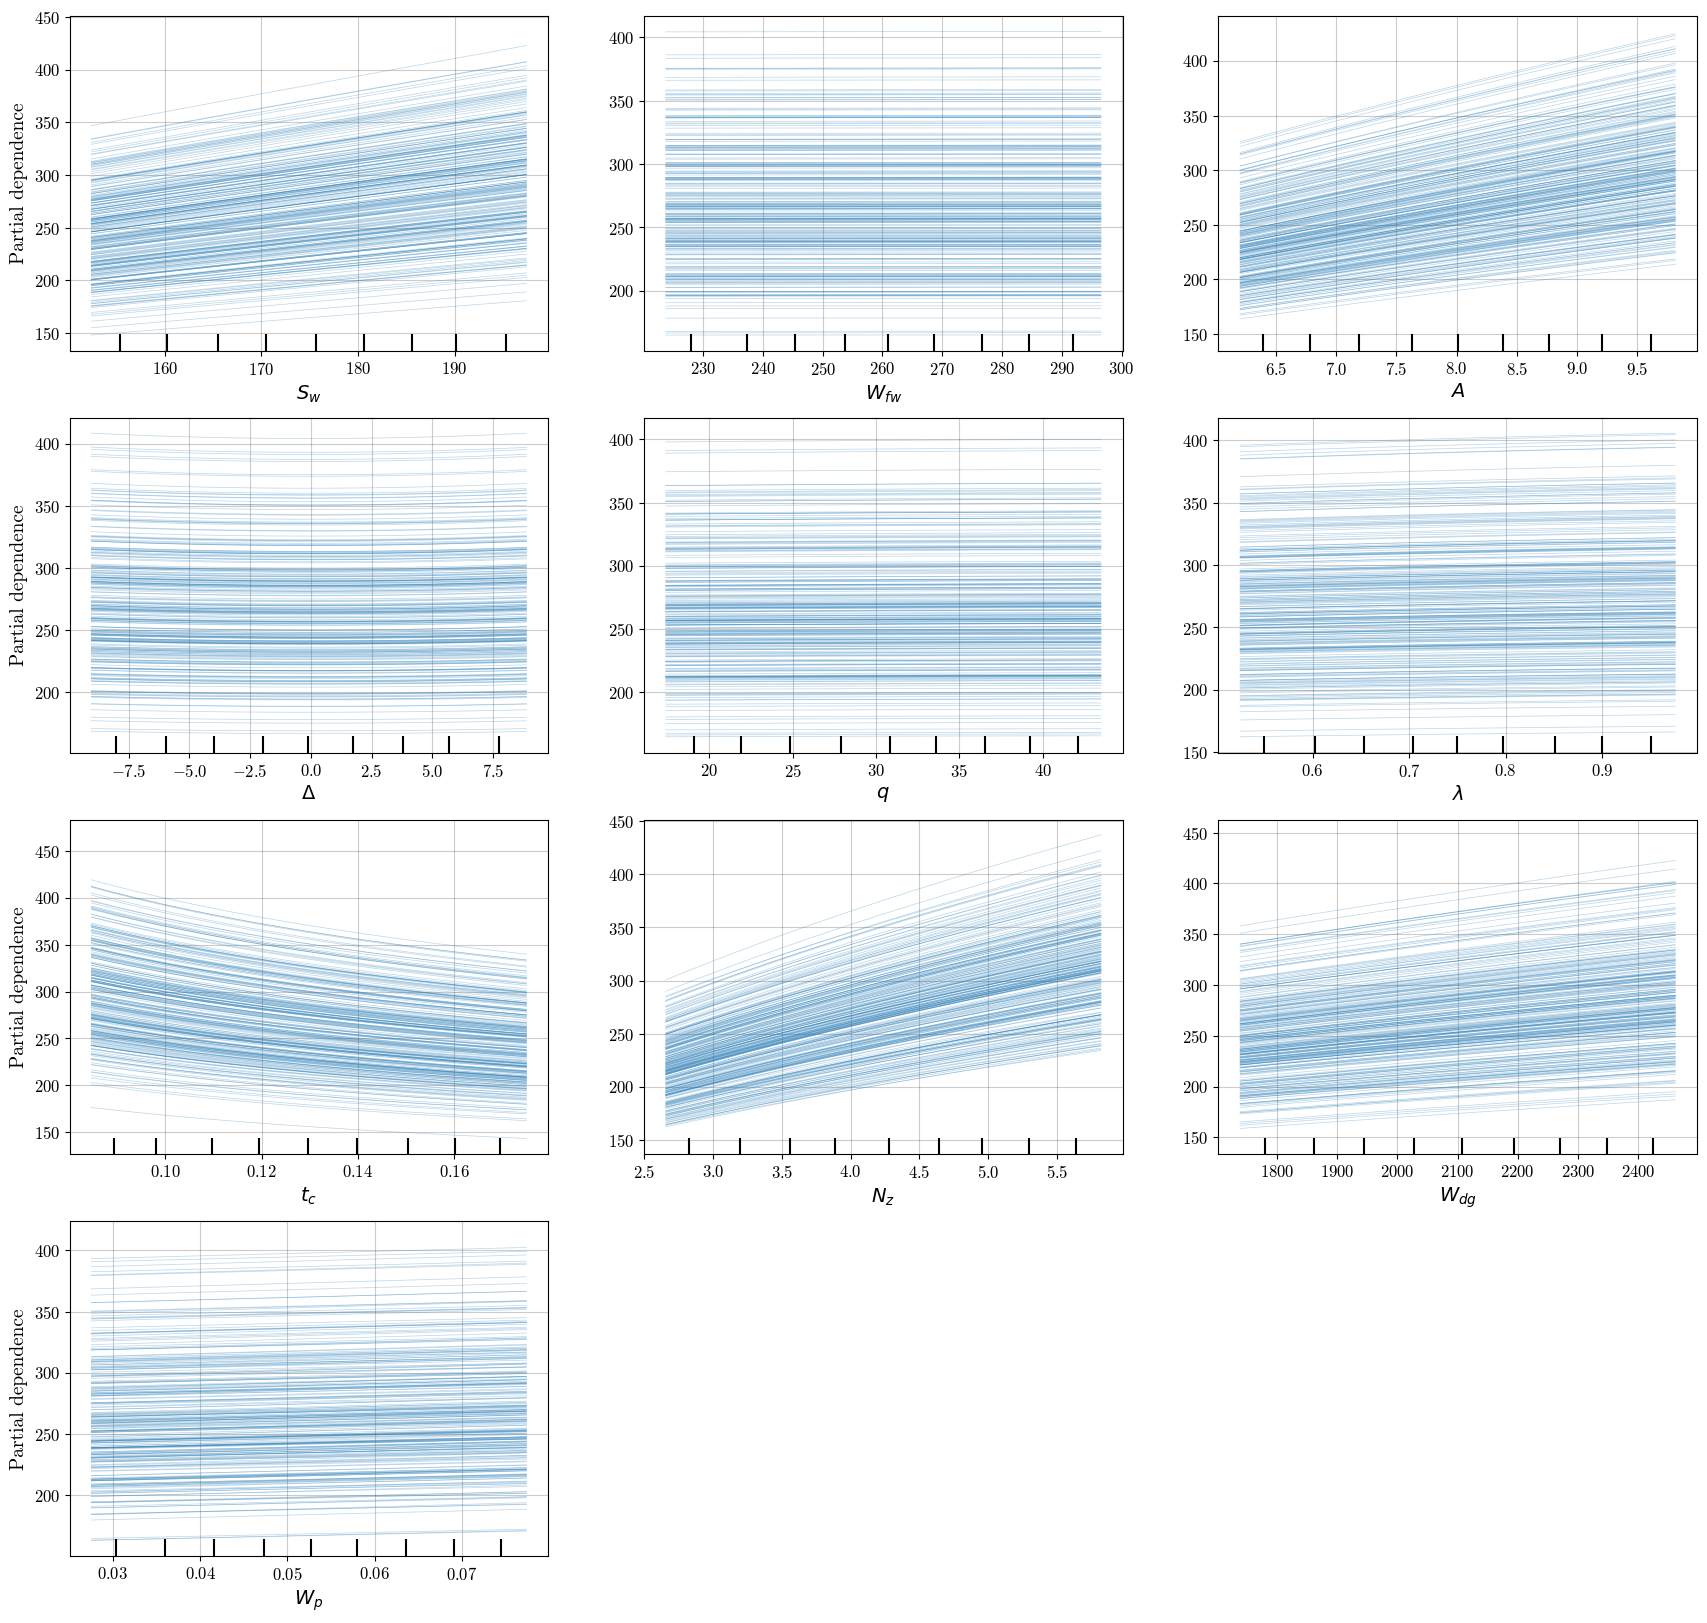

In [5]:
model = kriging_model
features = [0, 1, 2, 3, 4, 5, 6, 7, 8, 9]
feature_names = [r'$S_{w}$', r'$W_{fw}$', r'$A$', r'$\Delta$', 
                 r'$q$', r'$\lambda$', r'$t_{c}$',
                 r'$N_{z}$', r'$W_{dg}$', r'$W_{p}$']
pdd = PartialDependenceDisplay.from_surrogate_model(model, 
                                                    X_tr, 
                                                    features, 
                                                    grid_resolution=20, 
                                                    kind='individual', 
                                                    feature_names=feature_names,
                                                    centered=False)